# 보험사기자 찾기 전처리

### 데이터 불러오기

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;} *{font-family:'Consolas'; font-size:14;} .cm-s-ipython span.cm-comment {color: #87CEFA; font-style: italic;}</style>"))

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [5]:
pd.options.display.max_columns = 999 # 데이터프레임 출력시 최대 열의 개수 지정

In [6]:
%config InlineBackend.figure_format = "retina"

In [114]:
cust_df = pd.read_csv("CUST_DATA.csv", encoding="utf-16")

In [115]:
cust_df.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
0,1,1,N,2,47,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0
1,2,1,N,1,53,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0
2,3,1,N,1,60,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0
3,4,1,N,2,64,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0
4,5,1,N,2,54,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0


In [116]:
cust_df.describe(include='all') # 데이터의 요약 정보 출력

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM
count,22400.000000,22400.000000,20607,22400.000000,22400.000000,22400.000000,21146.000000,22400,21944.000000,21779,21805,21805,1.660900e+04,12924.000000,12924.000000,21927,10573,10573,21927.000000,21927.000000,15914.000000,1.591400e+04,17137.000000,22400.000000,21720.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,17,8,25,NaN,NaN,NaN,2,8,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,경기,8.기타,주부,NaN,NaN,NaN,Y,1.주부,주부,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18801,NaN,NaN,NaN,NaN,21182,NaN,5200,4879,4837,NaN,NaN,NaN,12010,2394,2402,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11200.500000,1.080045,NaN,1.565134,44.734866,15914.413973,25.765251,NaN,198924.250638,NaN,NaN,NaN,2.998266e+07,5.838904,19.480656,NaN,NaN,NaN,0.709491,8.603731,200881.825437,4.807763e+05,2704.184863,4768.733884,5198.238950
std,6466.467351,0.271368,NaN,0.495750,15.445707,14963.317519,20.691869,NaN,16989.329112,NaN,NaN,NaN,4.897438e+07,3.515198,32.363151,NaN,NaN,NaN,0.953671,11.585592,522.266749,1.327265e+06,2188.208641,3072.385280,2714.947843
min,1.000000,1.000000,NaN,1.000000,2.000000,0.000000,11.000000,NaN,101.000000,NaN,NaN,NaN,5.000000e+02,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000
25%,5600.750000,1.000000,NaN,1.000000,34.000000,6732.750000,20.000000,NaN,200306.000000,NaN,NaN,NaN,6.665459e+06,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200404.000000,1.129440e+05,0.000000,2995.000000,3557.750000
50%,11200.500000,1.000000,NaN,2.000000,46.000000,12222.000000,20.000000,NaN,200306.000000,NaN,NaN,NaN,1.622463e+07,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200901.000000,2.265920e+05,3432.000000,4807.000000,4681.000000
75%,16800.250000,1.000000,NaN,2.000000,56.000000,20988.000000,30.000000,NaN,200402.000000,NaN,NaN,NaN,3.479439e+07,6.000000,7.000000,NaN,NaN,NaN,1.000000,19.000000,201402.000000,4.852868e+05,4398.000000,6607.250000,6839.500000


In [117]:
cust_df.shape

(22400, 25)

### 데이터 전처리

#### 나이를 연령대로 변환

- 고객의 나이(AGE)를 연령대로 변환하세요. 예를 들면 47세는 4가 됩니다.<br>
- 변환 후 AGE의 ①평균과 ②표준편차(표본표준편차)를 소수점 이하 6자리까지 엑셀파일에 입력하세요. 

In [118]:
cust_df["AGE"]

0        47
1        53
2        60
3        64
4        54
         ..
22395    34
22396    30
22397    23
22398    15
22399    18
Name: AGE, Length: 22400, dtype: int64

In [119]:
cust_df.AGE = cust_df.AGE.map(lambda x: int(x//10))

#### 지역 텍스트(CTPR)를 숫자로 인코딩

- 지역이 없는 결측치 행은 삭제하세요. 그리고 ③삭제 후 행의 수를 엑셀파일에 입력하세요.<br>
- 텍스트 데이터를 단순 레이블 인코딩 하세요. 그리고 레이블 인코딩한 값들의 ④평균과 ⑤표준편차를 엑셀파일에 입력하세요.(소수점 6자리까지)<br>
- 레이블 인코딩 한 데이터를 이용해서 원 핫 인코딩 하세요. 그 결과에서 서울 지역의 ⑥평균과 ⑦표준편차를 엑셀파일에 입력하세요.(소수점 6자리까지)<br>
- 원 핫 인코딩한 열의 이름은 지역의 이름이 되도록 하세요.<br>
- 고객 데이터와 지역을 원-핫 인코딩 한 데이터를 하나의 데이터 프레임으로 합치세요. 합치기 전에 결측치 행이 삭제되어 인덱스가 바뀌었다는 것에 주의 하세요.<br>
- 지역(CTPR) 열을 삭제하세요. 

##### 결측치 행 삭제

In [120]:
# 결측치 행의 인덱스
drop_index = cust_df.loc[cust_df.CTPR.isnull()].index

Int64Index([   82,   125,   164,   169,   170,   172,   174,   189,   211,
              218,
            ...
            22129, 22167, 22186, 22191, 22223, 22235, 22269, 22310, 22341,
            22358],
           dtype='int64', length=621)

In [121]:
# 결측치 행이 아닌 행들만 빼내서 저장
cust_df = cust_df.loc[~cust_df.CTPR.isnull()]

In [122]:
cust_df.shape

(21779, 25)

In [123]:
# 전처리한 데이터를 임시 저장
cust_df.to_csv("CUST_DATA_1-1.csv", index=False, encoding="utf-8-sig")

##### 레이블 인코딩

In [124]:
# 지역 텍스트를 숫자로 인코딩 하기 위해, LabelEncoder 클래스를 사용
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(cust_df.CTPR)
ctpr = le.transform(cust_df.CTPR)
# ctpr = le.fit_transform(cust_df.CTPR)

In [125]:
le.classes_

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [126]:
ctpr.mean(), ctpr.std() # Numpy의 표준편차는 모표준편차

(6.2645208687267555, 4.676745153961355)

In [127]:
ctpr_df = pd.DataFrame(data=np.c_[ctpr])

In [128]:
ctpr_df.describe()

,0
count,21779.000000
mean,6.264521
std,4.676853
min,0.000000
25%,1.000000
50%,7.000000
75%,10.000000
max,16.000000


In [129]:
print(ctpr_df.std(ddof=0)) # ddof(델타 자유도)가 0이면 모표준편차
print(ctpr_df.std())       # ddof(델타 자유도)가 1이면 표본표준편차

0    4.676745
dtype: float64
0    4.676853
dtype: float64


###### LabelEncoder 사용하지 않고 인코딩하기

In [130]:
ctpr_class = set(cust_df.CTPR)
ctpr_list = list(ctpr_class)

In [131]:
cust_df.CTPR.map(lambda x : ctpr_list.index(x))

0         5
1        15
2        15
3        16
4        14
         ..
22395    11
22396    16
22397    16
22398    16
22399    16
Name: CTPR, Length: 21779, dtype: int64

#### 원-핫 인코딩

In [132]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(ctpr.reshape(-1, 1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [133]:
ctpr_onehot = enc.transform(ctpr.reshape(-1,1))

In [134]:
ctpr_onehot.toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [135]:
ctpr_df = pd.DataFrame(ctpr_onehot.toarray(), columns=le.classes_)
# ctpr_df = pd.DataFrame(ctpr_onehot.toarray(), columns=ctpr_list)

In [136]:
ctpr_df.describe()

,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
count,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000
mean,0.026218,0.238762,0.073236,0.045043,0.039625,0.045824,0.023417,0.069746,0.168373,0.001883,0.032508,0.067267,0.051380,0.044171,0.008724,0.035217,0.028606
std,0.159786,0.426337,0.260529,0.207404,0.195082,0.209108,0.151227,0.254724,0.374206,0.043348,0.177350,0.250489,0.220776,0.205480,0.092996,0.184333,0.166699
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [137]:
# 이렇게 만들어진 ctpr_df 데이터프레임의 인덱스는 0부터 21779까지
ctpr_df.index

RangeIndex(start=0, stop=21779, step=1)

In [138]:
# cust_df 데이터프레임은 중간의 행들이 삭제되어서 인덱스가 순서대로 되어있지 않음
# (아까 결측치 삭제해서)
cust_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22390, 22391, 22392, 22393, 22394, 22395, 22396, 22397, 22398,
            22399],
           dtype='int64', length=21779)

In [139]:
# 따라서, 고객데이터와 원-핫 인코딩한 cust_df 데이터와 ctpr_df 데이터를 결합(concat)하기 전에,
# cust_df 데이터프레임의 인덱스를 초기화해야 함
cust_df.reset_index(drop=True, inplace=True)
cust_df = pd.concat([cust_df, ctpr_df], axis=1)

In [140]:
cust_df.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,CTPR,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,1,1,N,2,4,21111,20.0,N,199910.0,충북,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,N,1,5,40000,20.0,N,199910.0,서울,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,N,1,6,0,NaN,N,199910.0,서울,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,경기,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,N,2,5,0,NaN,Y,199910.0,광주,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
# 원본 데이터 열(CTPR)은 삭제
cust_df.drop("CTPR", axis=1, inplace=True)

In [142]:
cust_df.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,1,1,N,2,4,21111,20.0,N,199910.0,3.사무직,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,N,1,5,40000,20.0,N,199910.0,3.사무직,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,N,1,6,0,NaN,N,199910.0,5.서비스,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,N,2,6,12861,40.0,Y,199910.0,2.자영업,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,1,N,2,5,0,NaN,Y,199910.0,2.자영업,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# 전처리한 데이터 임시 저장
cust_df.to_csv("CUST_DATA_1-2.csv", index=False, encoding="utf-8-sig")

#### 직업에서 직업 코드만 빼내기

- 직업(OCCP_GRP_1) 열의 값에서 가장 첫 문자(직업코드)만 빼내서 저장하세요. <br>
(1.주부 > 1)
- 숫자로 바꾸는 것이 아닙니다. 문자 그대로 두세요.(직업코드가 없는 데이터는 'n'으로 표시되도록 하세요.)<br>
- ⑧가장 많은 직업의 코드를 엑셀파일에 입력하세요.<br>
- ⑨가장 많은 직업 코드의 개수를 엑셀파일에 입력하세요.<br>

In [144]:
set(cust_df.OCCP_GRP_1)

{'1.주부', '2.자영업', '3.사무직', '4.전문직', '5.서비스', '6.제조업', '7.1차산업', '8.기타', nan}

In [145]:
import missingno

C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48513 missing from current font.

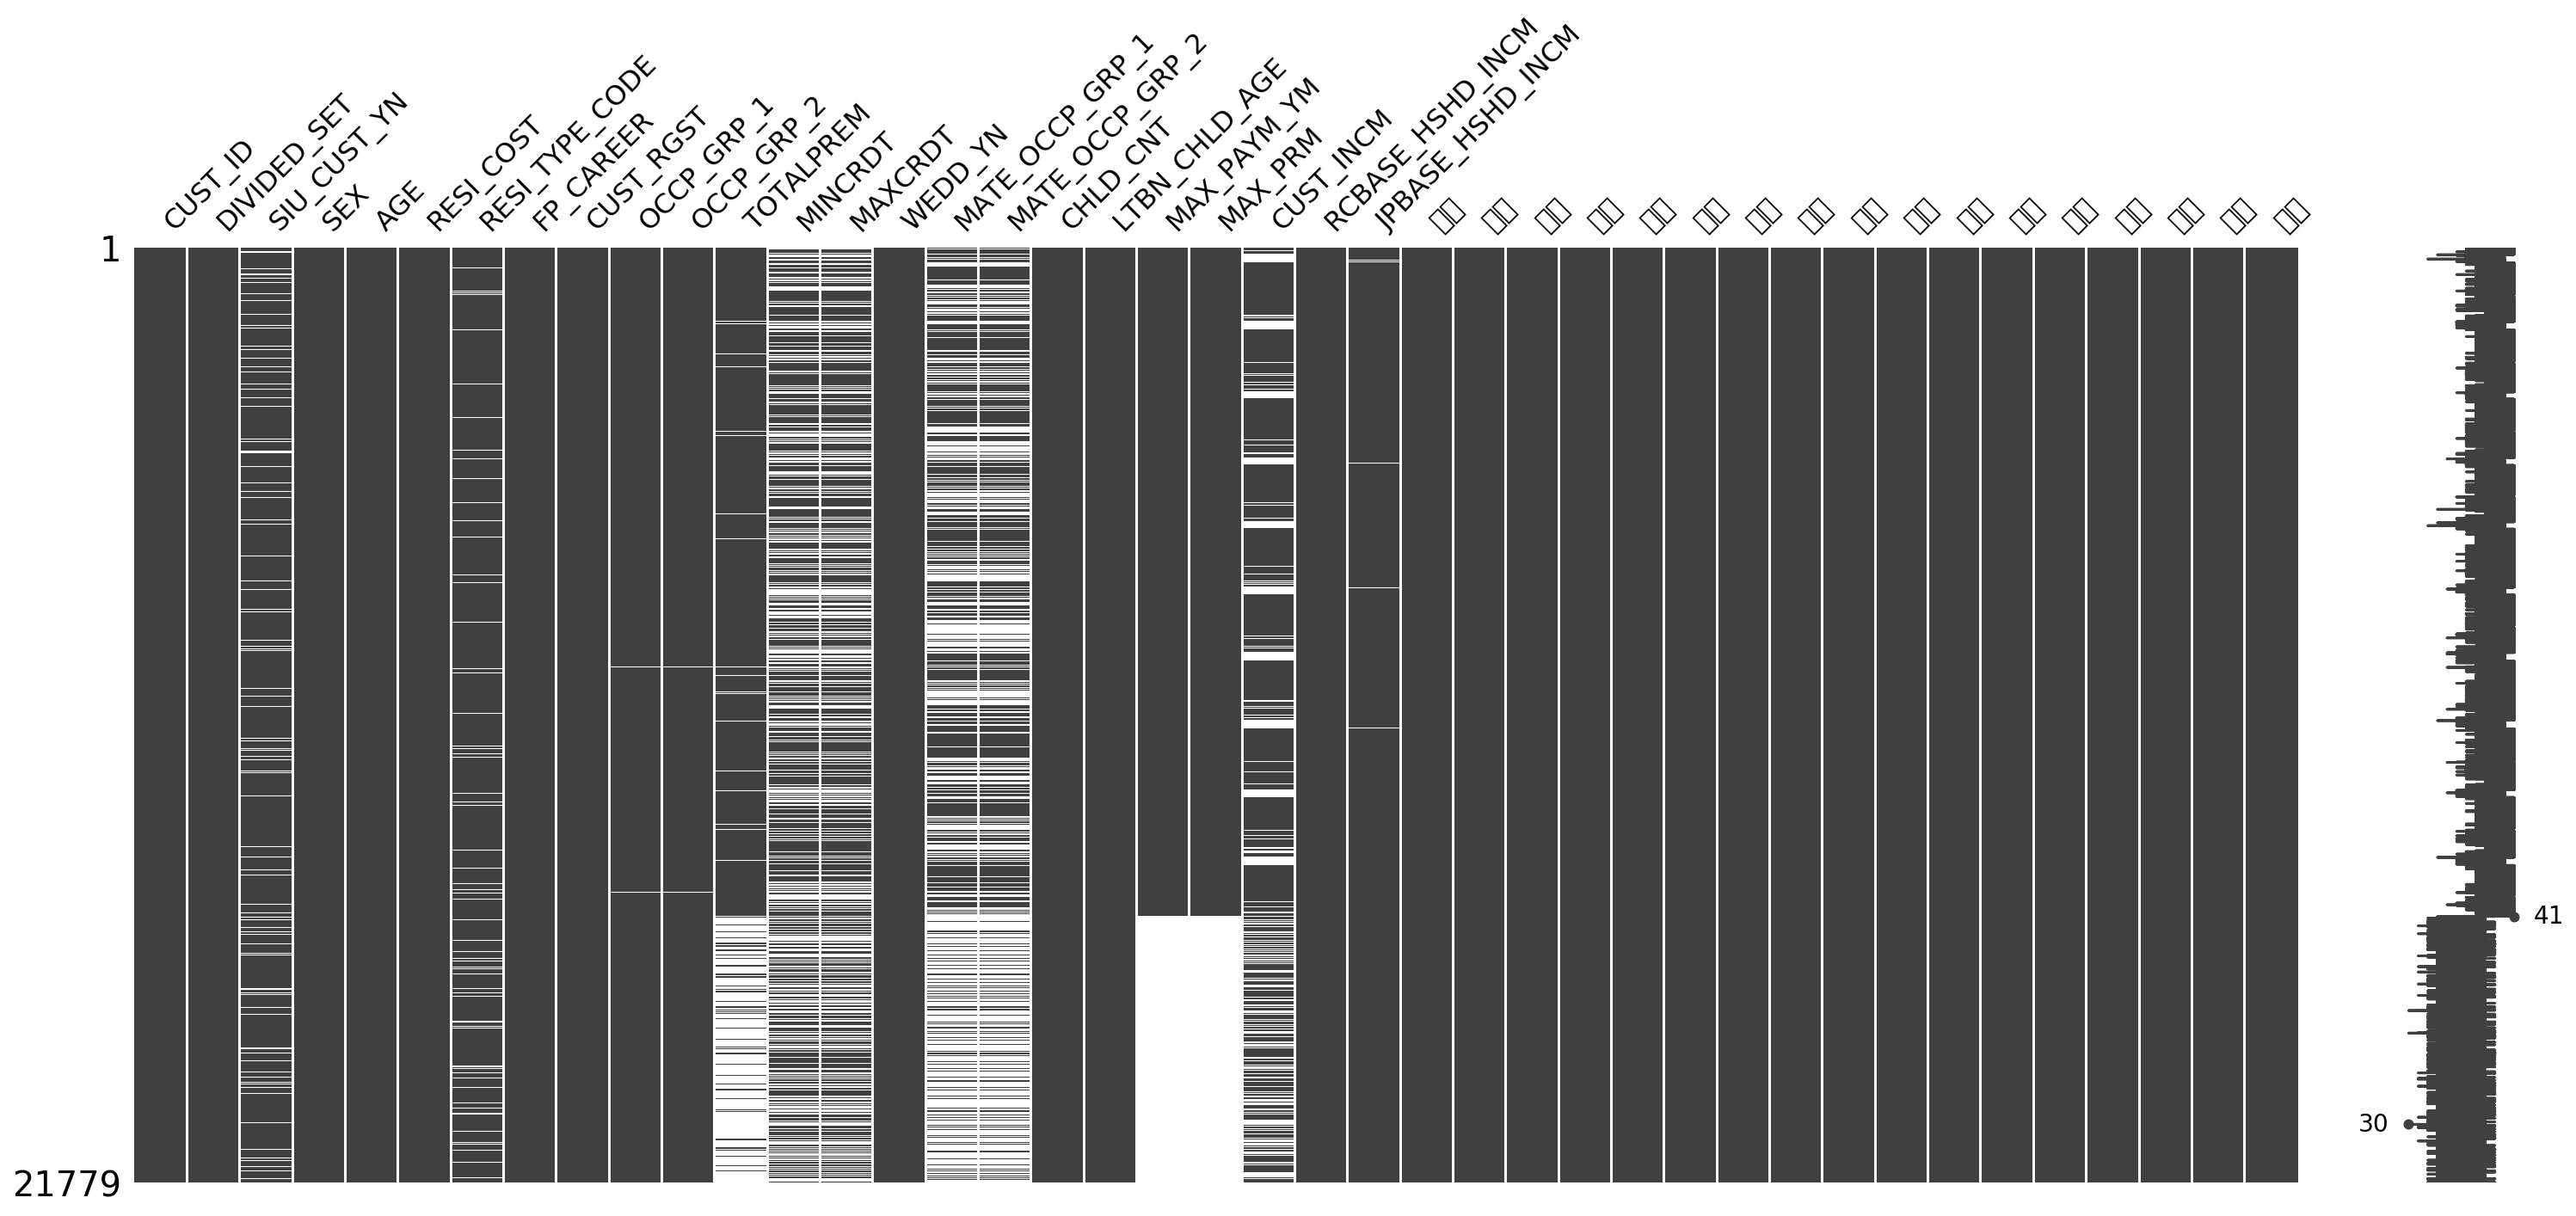

In [146]:
missingno.matrix(cust_df)

In [147]:
# map 함수를 이용해서 직업코드 문자열에서 첫 문자만 추출
cust_df.OCCP_GRP_1 = cust_df.OCCP_GRP_1.map(lambda x: str(x)[0])

In [148]:
# 요약통계량을 통해서 가장 많은 직업의 코드와 해당 직업코드의 수를 확인
cust_df.describe(include='all')

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
count,21779.000000,21779.000000,20032,21779.000000,21779.000000,21779.000000,20717.000000,21779,21779.000000,21779,21710,1.626700e+04,12792.000000,12792.000000,21762,10544,10544,21762.000000,21762.000000,15583.000000,1.558300e+04,16999.000000,21779.000000,21556.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000,21779.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,2,NaN,9,25,NaN,NaN,NaN,2,8,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,N,NaN,NaN,NaN,NaN,N,NaN,8,주부,NaN,NaN,NaN,Y,1.주부,주부,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18254,NaN,NaN,NaN,NaN,20577,NaN,4868,4834,NaN,NaN,NaN,11978,2387,2395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11194.877910,1.080215,NaN,1.569723,3.987832,16067.469627,25.726553,NaN,198910.253960,NaN,NaN,3.025541e+07,5.838024,19.581223,NaN,NaN,NaN,0.713905,8.656833,200887.967914,4.836190e+05,2694.432849,4822.017540,5208.083967,0.026218,0.238762,0.073236,0.045043,0.039625,0.045824,0.023417,0.069746,0.168373,0.001883,0.032508,0.067267,0.051380,0.044171,0.008724,0.035217,0.028606
std,6460.805265,0.271632,NaN,0.495126,1.567412,14954.162250,20.629956,NaN,17052.758201,NaN,NaN,4.927764e+07,3.529302,32.464292,NaN,NaN,NaN,0.955101,11.601555,522.195038,1.338032e+06,2191.392914,3054.927893,2713.491611,0.159786,0.426337,0.260529,0.207404,0.195082,0.209108,0.151227,0.254724,0.374206,0.043348,0.177350,0.250489,0.220776,0.205480,0.092996,0.184333,0.166699
min,1.000000,1.000000,NaN,1.000000,0.000000,0.000000,11.000000,NaN,101.000000,NaN,NaN,5.000000e+02,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,199801.000000,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5598.500000,1.000000,NaN,1.000000,3.000000,6865.000000,20.000000,NaN,200306.000000,NaN,NaN,6.782680e+06,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200405.000000,1.138185e+05,0.000000,3081.000000,3561.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11178.000000,1.000000,NaN,2.000000,4.000000,12261.000000,20.000000,NaN,200306.000000,NaN,NaN,1.641480e+07,6.000000,6.000000,NaN,NaN,NaN,0.000000,0.000000,200902.000000,2.282620e+05,3425.000000,4848.000000,4689.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16791.500000,1.000000,NaN,2.000000,5.000000,21111.000000,20.000000,NaN,200401.000000,NaN,NaN,3.514479e+07,6.000000,7.000000,NaN,NaN,NaN,2.000000,19.000000,201403.000000,4.886120e+05,4393.000000,6638.500000,6854.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [149]:
# 전처리한 데이터 임시 저장
cust_df.to_csv("CUST_DATA_1-3.csv", index=False, encoding="utf-8-sig")

In [8]:
cust_df = pd.read_csv("CUST_DATA_1-3.csv", encoding="utf-8-sig")

### 파생변수 추가

#### 고객별 평균 입원일

- 보험 청구 데이터(CLAIM_DATA.csv)에서 각 고객별 평균 입원 일수를 저장한 열을 고객 테이블에 추가하세요.<br> 
- 입원일을 저장한 열의 이름은 VLID_HOSP_OTDA입니다. <br>
- 새로 만들어져야 할 열 이름은 HOSP_DAY입니다. <br>
- HOSP_DAY 열의 ⑩평균과 ⑪표준편차를 입력하세요. <br>
- ⑫고객들 중에서 가장 많이 입원한 고객의 일수는 며칠인지 엑셀파일에 입력하세요.

In [10]:
# 보험 청구 데이터에서 입원일은 VLID_HOSP_OTDA 열에 저장되어 있음
# 각 고객별로 청구데이터를 분석하여 고객별 평균 입원일을 집계하고, 이를 고객 데이터프레임에 추가해야 함
# 이에 관한 열 이름은 HOSP_DAY

claim_df = pd.read_csv("CLAIM_DATA.csv", encoding="utf-16")

In [21]:
# 고객의 아이디로 그룹핑 (DataFrameGroupBy 객체)
claim_df_g = claim_df.groupby(claim_df.CUST_ID)

In [22]:
# 그룹핑한 데이터의 평균을 계산하고 VLID_HOSP_OTDA 열만 따로 추출
claim_df_g_mean = claim_df_g.mean()
claim_df_hospday = claim_df_g_mean.loc[:, ["VLID_HOSP_OTDA"]]

In [23]:
claim_df_hospday.columns

Index(['VLID_HOSP_OTDA'], dtype='object')

In [24]:
# 행 인덱스를 초기화(행 인덱스는 행의 이름이 되도록)
# Result: 고객별 평균입원일을 저장한 데이터프레임
claim_df_hospday.reset_index(level=0, inplace=True)
claim_df_hospday.columns = ['CUST_ID', 'HOSP_DAY']

In [25]:
# 고객 데이터와 고객별 평균입원일을 저장한 데이터프레임을 병합
cust_df = pd.merge(cust_df, claim_df_hospday, how="inner")

In [ ]:
# 전처리한 데이터 임시 저장
cust_df.to_csv("CUST_DATA_1-4.csv", index=False, encoding="utf-8-sig")

#### 데이터 구조 변경

- 사고원인(ACCI_DVSN)과 청구코드(DMND_RESN_CODE)를 이용한 파생변수를 만드세요. <br>
- 사고원인 구분 코드(재해(1), 교통재해(2), 질병(3))와 지급청구의 원인이 되는 사유 코드(사망(01), 입원(02), 통원(03), 장해(04), 수술(05), 진단(06), 치료(07), 해지/무효(09))를 조합하여 고객별로 사고구분_청구사유 횟수를 계산해야 합니다.<br>
- 새로 만들어진 열의 이름은 1_1, 1_2 ... 형식여야 합니다.(2_7, 2_9는 없음)<br>
- 이렇게 만들어진 사고유형_청구코드의 조합 테이블은 고객테이블과 병합되어야 합니다. <br>
- 교통재해(2)와 입원(2)의 횟수에 대한 ⑬평균과 ⑭표준편차를 엑셀파일에 소수점 6째자리까지 입력하세요. 

##### 피벗 테이블 생성

In [27]:
claim_df.head()

,CUST_ID,POLY_NO,ACCI_OCCP_GRP1,ACCI_OCCP_GRP2,CHANG_FP_YN,CNTT_RECP_SQNO,RECP_DATE,ORIG_RESN_DATE,RESN_DATE,CRNT_PROG_DVSN,ACCI_DVSN,CAUS_CODE,CAUS_CODE_DTAL,DSAS_NAME,DMND_RESN_CODE,DMND_RSCD_SQNO,HOSP_OTPA_STDT,HOSP_OTPA_ENDT,RESL_CD1,RESL_NM1,VLID_HOSP_OTDA,HOUSE_HOSP_DIST,HOSP_CODE,ACCI_HOSP_ADDR,HOSP_SPEC_DVSN,CHME_LICE_NO,PAYM_DATE,DMND_AMT,PAYM_AMT,PMMI_DLNG_YN,SELF_CHAM,NON_PAY,TAMT_SFCA,PATT_CHRG_TOTA,DSCT_AMT,COUNT_TRMT_ITEM,DCAF_CMPS_XCPA,NON_PAY_RATIO,HEED_HOSP_YN
0,5936,1365,8.기타,학생,Y,2006011200001,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,20000,20000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
1,5936,6151,8.기타,학생,Y,2006011200002,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,30000,30000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
2,5936,10364,8.기타,학생,Y,2006011200003,20060112,20060109,20060109,11,1,W21,#,하악부표재성손상,3,2,20060109.0,20060111.0,S00,머리의 얕은(표재성)손상,2,NaN,12537.0,NaN,95.0,11606,20060112.0,40000,40000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
3,1043,1247,1.주부,주부,N,2006011200004,20060112,20060105,20060105,23,3,A09,#,기타세균성창자감염|손목및손의2도화상|피부염,2,1,20060105.0,20060110.0,A09,감염성 및 상세불명 기원의 기타위장염 및 결장염,6,NaN,12537.0,NaN,95.0,17647,20060113.0,60000,60000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N
4,8545,11236,1.주부,주부,Y,2006011200005,20060112,20060110,20060110,11,3,I83,#,좌측하지정맥류혈관발거술|레이저소작술,5,1,NaN,NaN,I83,다리(하지)의 정맥류,0,4.88,2305.0,경기,30.0,25697,20060112.0,200000,200000,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,N


In [28]:
# 사용자 아이디, 사고원인, 청그코드 데이터 추출
claim_df_acci = claim_df.loc[:, ["CUST_ID", "ACCI_DVSN", "DMND_RESN_CODE"]]
claim_df_acci["value"] = 1

In [36]:
# 피벗 테이블 생성
cust_claim_df = claim_df_acci.pivot_table(index=["CUST_ID"], columns=["ACCI_DVSN", "DMND_RESN_CODE"],
                                         values=["value"], aggfunc='sum', fill_value=0)

In [31]:
cust_claim_df.head()

value                                                           \
ACCI_DVSN          1                       2                 3                  
DMND_RESN_CODE     1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3  4  5  6   
CUST_ID                                                                         
1                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  0   
2                  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0   
3                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   
4                  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
5                  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0   

                      
ACCI_DVSN             
DMND_RESN_CODE  7  9  
CUST_ID               
1               0  0  
2               0  0  
3               0  0  
4               0  0  
5               0  0

In [32]:
# col_level에 따른 reset_index 결과 차이 확인
cust_claim_df.reset_index(level=["CUST_ID"], col_level=1).head()

value                                                  \
ACCI_DVSN      CUST_ID     1                       2                 3         
DMND_RESN_CODE             1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3   
0                    1     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4   
1                    2     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3   
2                    3     0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
3                    4     0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0   
4                    5     0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   

                               
ACCI_DVSN                      
DMND_RESN_CODE  4  5  6  7  9  
0               0  0  0  0  0  
1               0  0  0  0  0  
2               0  0  0  0  0  
3               0  0  0  0  0  
4               0  0  0  0  0

In [33]:
cust_claim_df.reset_index(level=["CUST_ID"], col_level=0).head()

CUST_ID value                                                  \
ACCI_DVSN                  1                       2                 3         
DMND_RESN_CODE             1  2  3  4  5  6  7  9  1  2  3  4  5  6  1  2  3   
0                    1     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4   
1                    2     0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3   
2                    3     0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
3                    4     0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0   
4                    5     0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   

                               
ACCI_DVSN                      
DMND_RESN_CODE  4  5  6  7  9  
0               0  0  0  0  0  
1               0  0  0  0  0  
2               0  0  0  0  0  
3               0  0  0  0  0  
4               0  0  0  0  0

In [37]:
cust_claim_df = cust_claim_df.reset_index(level=["CUST_ID"], col_level=1)
cust_claim_df.columns = cust_claim_df.columns.droplevel(level=0)

In [38]:
cust_claim_df.columns

MultiIndex([('CUST_ID', ''),
            (        1,  1),
            (        1,  2),
            (        1,  3),
            (        1,  4),
            (        1,  5),
            (        1,  6),
            (        1,  7),
            (        1,  9),
            (        2,  1),
            (        2,  2),
            (        2,  3),
            (        2,  4),
            (        2,  5),
            (        2,  6),
            (        3,  1),
            (        3,  2),
            (        3,  3),
            (        3,  4),
            (        3,  5),
            (        3,  6),
            (        3,  7),
            (        3,  9)],
           names=['ACCI_DVSN', 'DMND_RESN_CODE'])

In [40]:
[col[0] for col in cust_claim_df.columns]

['CUST_ID', 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3]

In [41]:
[col[1] for col in cust_claim_df.columns]

['', 1, 2, 3, 4, 5, 6, 7, 9, 1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 9]

In [44]:
L = ["A", "B"]
"_".join(L)

'A_B'

In [46]:
cust_claim_df.columns = ['_'.join([str(col) for col in cols]) for cols in cust_claim_df.columns]

In [59]:
cust_claim_df.head()

,CUST_ID,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
cust_claim_df.rename(columns={'CUST_ID_':'CUST_ID'}, inplace=True)

In [60]:
cust_df.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,HOSP_DAY
0,1,1,N,2,4,21111,20.0,N,199910.0,3,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.250000
1,2,1,N,1,5,40000,20.0,N,199910.0,3,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667
2,3,1,N,1,6,0,NaN,N,199910.0,5,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000
3,4,1,N,2,6,12861,40.0,Y,199910.0,2,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,5,1,N,2,5,0,NaN,Y,199910.0,2,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000


In [51]:
cust_df.shape, cust_claim_df.shape

((21779, 42), (22400, 23))

In [63]:
result = pd.merge(cust_df, cust_claim_df, how="left")

In [64]:
result.head()

,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,RESI_COST,RESI_TYPE_CODE,FP_CAREER,CUST_RGST,OCCP_GRP_1,OCCP_GRP_2,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,MATE_OCCP_GRP_1,MATE_OCCP_GRP_2,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,HOSP_DAY,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,1,N,2,4,21111,20.0,N,199910.0,3,사무직,146980441.0,NaN,NaN,Y,3.사무직,2차산업 종사자,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,1,N,1,5,40000,20.0,N,199910.0,3,사무직,94600109.0,1.0,6.0,Y,1.주부,주부,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,1,N,1,6,0,NaN,N,199910.0,5,2차산업 종사자,18501269.0,NaN,NaN,N,NaN,NaN,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,1,N,2,6,12861,40.0,Y,199910.0,2,3차산업 종사자,317223657.0,2.0,99.0,N,NaN,NaN,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,1,N,2,5,0,NaN,Y,199910.0,2,3차산업 종사자,10506072.0,8.0,8.0,Y,3.사무직,고위 공무원,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


#### 열 삭제

- 다음 열(column)들을 삭제하세요. <br>
    - 'FP_CAREER', 'DIVIDED_SET', 'RESI_TYPE_CODE', 'OCCP_GRP_2', 'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2'

In [65]:
result.columns

Index(['CUST_ID', 'DIVIDED_SET', 'SIU_CUST_YN', 'SEX', 'AGE', 'RESI_COST',
       'RESI_TYPE_CODE', 'FP_CAREER', 'CUST_RGST', 'OCCP_GRP_1', 'OCCP_GRP_2',
       'TOTALPREM', 'MINCRDT', 'MAXCRDT', 'WEDD_YN', 'MATE_OCCP_GRP_1',
       'MATE_OCCP_GRP_2', 'CHLD_CNT', 'LTBN_CHLD_AGE', 'MAX_PAYM_YM',
       'MAX_PRM', 'CUST_INCM', 'RCBASE_HSHD_INCM', 'JPBASE_HSHD_INCM', '강원',
       '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천', '전남',
       '전북', '제주', '충남', '충북', 'HOSP_DAY', '1_1', '1_2', '1_3', '1_4', '1_5',
       '1_6', '1_7', '1_9', '2_1', '2_2', '2_3', '2_4', '2_5', '2_6', '3_1',
       '3_2', '3_3', '3_4', '3_5', '3_6', '3_7', '3_9'],
      dtype='object')

In [68]:
drop_columns = ['FP_CAREER', 'DIVIDED_SET', 'RESI_TYPE_CODE', 'OCCP_GRP_2', 'MATE_OCCP_GRP_1', 'MATE_OCCP_GRP_2']
result.drop(drop_columns, axis=1, inplace=True)

#### 결과 파일 저장

- 결과 파일을 홍길동_result.csv 파일로 저장하세요.(홍길동 대신 본인의 이름을 사용)<br>
- 인덱스는 파일에 저장되지 않아야 합니다.<br>
- CUST_ID열은 정수형 이어야 합니다. <br>
- 저장하는 파일의 인코딩은 utf-8입니다.

In [69]:
result.to_csv("함다인_result.csv", index=False, encoding="utf-8")
result.head()

,CUST_ID,SIU_CUST_YN,SEX,AGE,RESI_COST,CUST_RGST,OCCP_GRP_1,TOTALPREM,MINCRDT,MAXCRDT,WEDD_YN,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,HOSP_DAY,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,1,N,2,4,21111,199910.0,3,146980441.0,NaN,NaN,Y,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,2,N,1,5,40000,199910.0,3,94600109.0,1.0,6.0,Y,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,3,N,1,6,0,199910.0,5,18501269.0,NaN,NaN,N,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,N,2,6,12861,199910.0,2,317223657.0,2.0,99.0,N,0.0,0.0,201009.0,1493184.0,NaN,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,N,2,5,0,199910.0,2,10506072.0,8.0,8.0,Y,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
train_test_df = result.loc[~result.SIU_CUST_YN.isnull()]

In [123]:
train_test_df.drop(["CUST_ID"], axis=1, inplace=True)

In [124]:
train_test_df.drop(["MINCRDT", "MAXCRDT", "WEDD_YN"], axis=1, inplace=True)

In [125]:
train_test_df.fillna(value=0, inplace=True)

In [126]:
train_test_df.head()

,SIU_CUST_YN,SEX,AGE,RESI_COST,CUST_RGST,OCCP_GRP_1,TOTALPREM,CHLD_CNT,LTBN_CHLD_AGE,MAX_PAYM_YM,MAX_PRM,CUST_INCM,RCBASE_HSHD_INCM,JPBASE_HSHD_INCM,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북,HOSP_DAY,1_1,1_2,1_3,1_4,1_5,1_6,1_7,1_9,2_1,2_2,2_3,2_4,2_5,2_6,3_1,3_2,3_3,3_4,3_5,3_6,3_7,3_9
0,N,2,4,21111,199910.0,3,146980441.0,2.0,13.0,200811.0,319718.0,4879.0,10094,11337.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.250000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0
1,N,1,5,40000,199910.0,3,94600109.0,2.0,17.0,200012.0,341341.0,6509.0,9143,6509.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.666667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0
2,N,1,6,0,199910.0,5,18501269.0,0.0,0.0,200305.0,131300.0,4180.0,0,4180.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,N,2,6,12861,199910.0,2,317223657.0,0.0,0.0,201009.0,1493184.0,0.0,4270,5914.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,2,5,0,199910.0,2,10506072.0,3.0,19.0,200807.0,166760.0,3894.0,0,8885.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
X = train_test_df.iloc[:, 1:]
Y = train_test_df.iloc[:, 0]

In [128]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0

In [129]:
train_test_df.OCCP_GRP_1 = train_test_df.OCCP_GRP_1.map(to_int)

C:\Users\COM\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [131]:
def yn_10(x):
    if x=='Y':
        return 1
    elif x=='N':
        return 0

In [132]:
Y.map(yn_10)

0        0
1        0
2        0
3        0
4        0
        ..
21773    1
21775    0
21776    0
21777    0
21778    0
Name: SIU_CUST_YN, Length: 20032, dtype: int64

In [133]:
X.shape, Y.shape

((20032, 53), (20032,))

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
train_X , test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.7)

In [136]:
train_X.shape, train_Y.shape

((14022, 53), (14022,))

In [137]:
from sklearn.neural_network import MLPClassifier

In [138]:
mlp = MLPClassifier(hidden_layer_sizes=(50,30))

In [139]:
mlp.fit(train_X, train_Y)

C:\Users\COM\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 30), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [140]:
pred = mlp.predict(test_X)

In [141]:
pred

array(['N', 'N', 'N', ..., 'N', 'N', 'N'], dtype='<U1')

In [142]:
# recall: 사기자라고 예측한 사람들 중에서 정말로 사기자인 사람들의 비율 
# precision: 사기자들 중에서 내가 사기자라고 예측한 사람들의 비율 
# accuracy: 전체 중에서 정답인 사람의 비율
pd.crosstab(test_Y, pred)

# (N, N): 내가 일반인(사기자가 아닌 사람)이라고 예측했고, 실제로 일반인이었던 사람들의 수
# (N, Y): 내가 사기자라고 예측했는데, 실제로 일반인이었던 사람들의 수
# (Y, N): 내가 일반인(사기자가 아닌 사람)이라고 예측했고, 실제로 사기자였던 사람들의 수
# (Y, Y): 내가 사기자라고 예측했는데, 실제로 사기자였던 사람들의 수

col_0,N,Y
SIU_CUST_YN,,
N,5458,18
Y,533,1
